In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
dataset=pd.read_csv('Life Expectancy Data.csv')
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [23]:
def fillNaWithMean(column):
    dataset[column].fillna(dataset[column].mean(),inplace=True)
    
for column in dataset.columns:
    if dataset[column].isnull().sum()>0 and dataset[column].dtype in ['float64','int64']: 
        fillNaWithMean(column)

C:\Users\am536\AppData\Local\Temp\ipykernel_23864\296267624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[column].fillna(dataset[column].mean(),inplace=True)


In [24]:
dataset.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [25]:
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [27]:
import category_encoders as ce

In [28]:
encoder = ce.LeaveOneOutEncoder(cols=['Country', 'Status'])
dataset[['Country_encoded', 'Status_encoded']] = encoder.fit_transform(dataset[['Country', 'Status']], dataset['Life expectancy '])


In [29]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded,Status_encoded
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,57.740000,67.121051
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,58.080000,67.123154
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,58.080000,67.123154
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,58.106667,67.123319
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,58.126667,67.123443


In [30]:
dataset.drop(['Country', 'Status'], axis=1, inplace=True)
dataset.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded,Status_encoded
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,57.740000,67.121051
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,58.080000,67.123154
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,58.080000,67.123154
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,58.106667,67.123319
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,58.126667,67.123443


In [31]:
dataset.head()
x=dataset.drop('Life expectancy ', axis=1)
y=dataset['Life expectancy ']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
x_train.shape
x_test.shape

(588, 21)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
regressor.coef_

array([ 1.48875083, -0.32459842,  1.9456387 , -0.0441173 ,  0.23994472,
       -0.17274445, -0.07861293, -0.08521703, -1.95711564,  0.08896352,
       -0.01267119,  0.24809565, -0.65634451, -0.17100166, -0.03657833,
       -0.03277062, -0.05084856,  0.03696518,  0.32213816,  8.13069211,
        0.06675009])

In [37]:
regressor.intercept_

np.float64(69.27697849087313)

In [38]:
y_pred=regressor.predict(x_test)

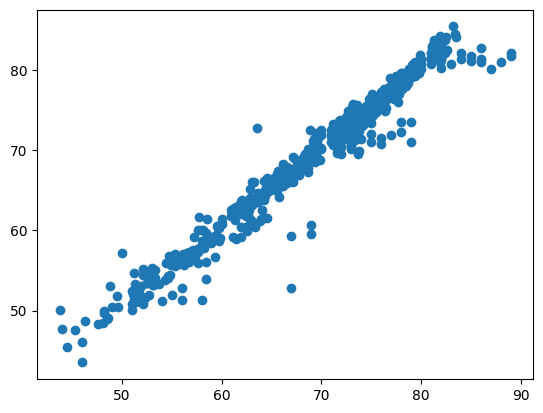

In [39]:
plt.scatter(y_test, y_pred)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred)*100)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.574483436166108
1.235478576434601
95.8741016780195
1.890630433523725


In [41]:
1 - (1-r2_score(y_test,y_pred))* (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9572102064487181

In [42]:
y_test

2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
859     59.7
1405    73.5
962     61.1
2658    69.6
2272    74.0
Name: Life expectancy , Length: 588, dtype: float64

In [43]:
y_pred

array([69.48422391, 75.76906454, 74.9555542 , 77.68099989, 53.05275002,
       50.48583304, 67.16383885, 74.01520484, 77.87141403, 51.91406483,
       51.10497295, 54.05167743, 58.32400831, 74.86392825, 70.29270214,
       60.38497751, 60.0679879 , 80.2866202 , 69.52227079, 80.0810125 ,
       80.1832984 , 82.7773    , 73.7806503 , 66.07381401, 72.04798829,
       70.86075632, 50.10995007, 66.0228207 , 83.82322586, 75.37521021,
       67.20834415, 73.5200487 , 74.78740743, 71.53862442, 79.37998943,
       51.75950614, 58.93219996, 70.28292169, 64.14528211, 73.30038319,
       54.36034247, 59.11889727, 74.31535483, 80.79425921, 77.49939089,
       48.66031042, 80.09712263, 75.14735439, 58.68241502, 71.07504117,
       51.33809683, 69.68163223, 81.39623119, 79.58441771, 74.2118909 ,
       56.73296134, 74.86233825, 75.55296486, 64.61198549, 70.51454164,
       77.63713186, 54.00526624, 74.94669528, 72.03958622, 53.42412215,
       55.51712168, 53.32290728, 77.833249  , 60.46708018, 72.19

In [44]:
print(x_test)

[[-0.3334299  -0.3424729  -0.18596531 ... -0.19250607  0.15421733
  -0.46369548]
 [-0.3334299  -0.42245146 -0.25751384 ...  0.57604246  0.75201922
   2.16071321]
 [-0.11655742 -0.32647718 -0.25751384 ...  0.48381663  0.57580965
  -0.46374025]
 ...
 [ 1.6184224   0.7692292  -0.23068314 ... -0.96105459 -1.08070594
  -0.4625673 ]
 [-0.3334299   0.1773878  -0.25751384 ...  0.0841714   0.20955587
  -0.46332837]
 [ 0.10031506 -0.27049218 -0.24857028 ...  0.45307469  0.51391786
  -0.46372234]]


In [45]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [46]:
y_pred_ridge=ridge.predict(x_test)

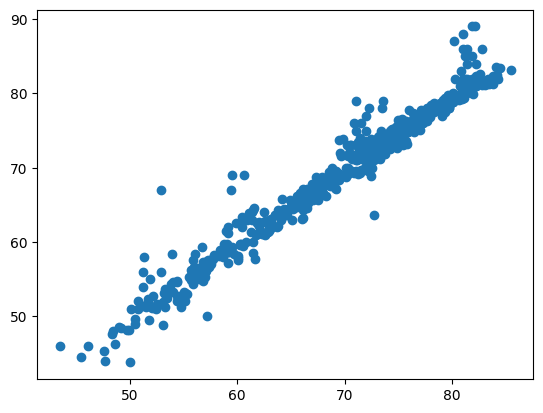

In [47]:
plt.scatter(y_pred_ridge, y_test)

In [48]:
print(mean_absolute_error(y_pred_ridge, y_test))
print(mean_squared_error(y_pred_ridge, y_test))
print(r2_score(y_pred_ridge, y_test))

1.2347648208385797
3.5745187495630146
0.9574381384516379


In [49]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print(mean_absolute_error(y_pred_lasso, y_test))
print(mean_squared_error(y_pred_lasso, y_test))
print(r2_score(y_pred_lasso, y_test))


1.2335349042706825
3.608044298942704
0.9569279586954227


In [50]:
from sklearn.linear_model import Ridge

ridge=Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge=ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, R2: {r2_ridge}")

Ridge Regression - MSE: 3.5745187495630146, MAE: 1.2347648208385797, R2: 0.9587406091702909


In [51]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_cv.fit(x_train, y_train)
ridge_cv.alpha_
y_pred_ridge_cv = ridge_cv.predict(x_test)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
print(f"RidgeCV - MSE: {mse_ridge_cv}, MAE: {mae_ridge_cv}, R2: {r2_ridge_cv}")


RidgeCV - MSE: 3.5745187495596085, MAE: 1.2347648208447524, R2: 0.9587406091703302


In [52]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred_elastic = elastic_net.predict(x_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"ElasticNet - MSE: {mse_elastic}, MAE: {mae_elastic}, R2: {r2_elastic}")

ElasticNet - MSE: 9.929842061106799, MAE: 2.274323224187997, R2: 0.885383386357513


In [53]:
from sklearn.linear_model import ElasticNetCV
elasticnet = ElasticNetCV()
elasticnet.fit(x_train, y_train)
y_pred_elastic_cv = elasticnet.predict(x_test)
mse_elastic_cv = mean_squared_error(y_test, y_pred_elastic_cv)
mae_elastic_cv = mean_absolute_error(y_test, y_pred_elastic_cv)
r2_elastic_cv = r2_score(y_test, y_pred_elastic_cv)
print(f"ElasticNetCV - MSE: {mse_elastic_cv}, MAE: {mae_elastic_cv}, R2: {r2_elastic_cv}")


ElasticNetCV - MSE: 3.6025290681713327, MAE: 1.2469191834312392, R2: 0.9584172960857347
